In [111]:
get_ipython().magic('matplotlib inline')
from sklearn import cluster
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from matplotlib.colors import LogNorm


In [84]:
data = pd.read_csv('faithful.csv')


In [160]:
#print(data)
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [161]:
clf2 = mixture.GMM(n_components=2)
clf2.fit(data.values)

/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/util

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

In [166]:
def plot_clf(clf):
    mask = clf.predict(data.values)
    xx = np.linspace(0, 6) 
    yy = np.linspace(40, 100) 
    X, Y = np.meshgrid(xx, yy)
    XX = np.c_[X.ravel(), Y.ravel()]
    Z =  clf.score_samples(XX)[0]
    Z = Z.reshape(X.shape)

    CS = pyplot.contour(X, Y, Z)
    CB = pyplot.colorbar(CS, shrink=0.8, extend='both')
    pyplot.scatter(data.eruptions, data.waiting, c=mask);

/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


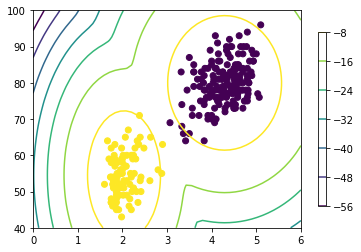

In [167]:
plot_clf(clf2)


In [147]:
M = 2 # number of mixtures
alpha = np.ones(M)*.5 # -> likelihood of the mixture
mu = np.random.random(M)*10 # -> mean of the gaussian
w_mt = np.zeros((M,len(data))) # -> q(mixture | data, parameter)
sigma = np.sqrt(np.sum(w_mt*pow(data - mu[:,np.newaxis],2),axis=1) / np.sum(w_mt,axis=1))



ValueError: Unable to coerce to DataFrame, shape must be (272, 2): given (2, 1)

In [148]:
# EM
for i in range(100):
    print("alpha:", alpha, "mu:", mu, "sigma:", sigma)

    # E-step
    for m in range(M):
        w_mt[m] = alpha[m] * mlab.normpdf(x,mu[m],sigma[m])
    C = np.sum(w_mt, axis=0) # normalization
    w_mt = w_mt / C

    # M-step
    alpha = np.sum(w_mt,axis=1) / len(x)
    mu = np.sum(w_mt*x,axis=1)/np.sum(w_mt,axis=1)
    sigma = np.sum(w_mt*pow(x - mu[:,np.newaxis],2),axis=1) / np.sum(w_mt,axis=1)

    sigma[sigma < 0.1] = 0.1 # avoid numerical problems


alpha: [ 0.5  0.5] mu: [ 5.86341141  0.16122485] sigma: [ 1.  1.]


ValueError: could not broadcast input array from shape (50) into shape (272)

In [149]:
x1 = 1.0 * np.random.randn(10000) - 10.0
x2 = 1.0 * np.random.randn(10000) + 10.0
x3 = 1.0 * np.random.randn(10000) + 5.0
x = np.hstack([x1,x2,x3]) # final data set

(30000,)

In [152]:
M = 3 # number of mixtures
alpha = np.ones(M)*.5 # -> likelihood of the mixture
mu = np.random.random(M)*10 # -> mean of the gaussian
#sigma = np.ones(M)*1.0 # -> std of the gaussian
sigma = np.sqrt(np.sum(w_mt*pow(x - mu[:,np.newaxis],2),axis=1) / np.sum(w_mt,axis=1))

w_mt = np.zeros((M,len(x))) # -> q(mixture | data, parameter)

# EM
for i in range(100):
    print("alpha:", alpha, "mu:", mu, "sigma:", sigma)

    # E-step
    for m in range(M):
        w_mt[m] = alpha[m] * mlab.normpdf(x,mu[m],sigma[m])
    C = np.sum(w_mt, axis=0) # normalization
    w_mt = w_mt / C

    # M-step
    alpha = np.sum(w_mt,axis=1) / len(x)
    mu = np.sum(w_mt*x,axis=1)/np.sum(w_mt,axis=1)
    sigma = np.sum(w_mt*pow(x - mu[:,np.newaxis],2),axis=1) / np.sum(w_mt,axis=1)

    sigma[sigma < 0.1] = 0.1 # avoid numerical problems

alpha: [ 0.5  0.5  0.5] mu: [ 7.55727798  8.68849299  6.48998066] sigma: [ 10.39167343  11.07273419   9.82551669]
alpha: [ 0.33370746  0.31326167  0.35303087] mu: [ 1.70978301  1.73098307  1.55403709] sigma: [ 73.03738073  73.75123416  72.92014652]
alpha: [ 0.33452092  0.31102683  0.35445226] mu: [ 1.66226334  1.6619498   1.6602186 ] sigma: [ 73.22167176  73.2257052   73.2302949 ]
alpha: [ 0.33454034  0.31102799  0.35443167] mu: [ 1.66145585  1.66144823  1.6614208 ] sigma: [ 73.22590194  73.22595075  73.22608949]
alpha: [ 0.33454071  0.31102812  0.35443116] mu: [ 1.66144133  1.66144118  1.66144069] sigma: [ 73.2259821   73.22598292  73.22598561]
alpha: [ 0.33454072  0.31102813  0.35443115] mu: [ 1.66144106  1.66144106  1.66144105] sigma: [ 73.22598357  73.22598358  73.22598363]
alpha: [ 0.33454072  0.31102813  0.35443115] mu: [ 1.66144106  1.66144106  1.66144106] sigma: [ 73.2259836  73.2259836  73.2259836]
alpha: [ 0.33454072  0.31102813  0.35443115] mu: [ 1.66144106  1.66144106  1.66

In [106]:
def fit_samples(samples):
    gmix = mixture.GMM(n_components=2, covariance_type='full')
    gmix.fit(samples)
    print(gmix.means_)
    colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
    ax = pyplot.gca()
    ax.scatter(samples["eruptions"], samples["waiting"], c=colors, alpha=0.8)
    pyplot.show()

/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/util

[[  4.29050323  79.97808339]
 [  2.03736795  54.4887805 ]]


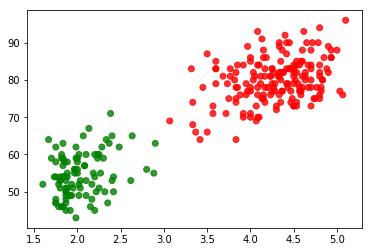

In [108]:
fit_samples(data)

In [125]:
gmix = mixture.GMM(n_components=2, covariance_type='full')
gmix.fit(data)
print(gmix.n_iter_)

/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/disheng/miniconda3/lib/python3.5/site-packages/sklearn/util

AttributeError: 'GMM' object has no attribute 'n_iter_'

In [126]:
# http://mattdickenson.com/2016/06/06/expectation-maximization-gaussian/
# initial guesses - intentionally bad
guess = { 'mu1': [1,1],
          'sig1': [ [1, 0], [0, 1] ],
          'mu2': [4,4],
          'sig2': [ [1, 0], [0, 1] ],
          'lambda': [0.4, 0.6]
        }

In [136]:
#E step
# assign every data point to its most likely cluster
def expectation(dataFrame, parameters):
    for i in range(dataFrame.shape[0]):
        x = dataFrame['eruptions'][i]
        y = dataFrame['waiting'][i]
        p_cluster1 = prob([x, y], list(parameters['mu1']), list(parameters['sig1']), parameters['lambda'][0] )
        p_cluster2 = prob([x, y], list(parameters['mu2']), list(parameters['sig2']), parameters['lambda'][1] )
        if p_cluster1 > p_cluster2:
            dataFrame['label'][i] = 1
        else:
            dataFrame['label'][i] = 2
    return dataFrame

In [129]:
#M step
def maximization(dataFrame, parameters):
    points_assigned_to_cluster1 = dataFrame[dataFrame['label'] == 1]
    points_assigned_to_cluster2 = dataFrame[dataFrame['label'] == 2]
    percent_assigned_to_cluster1 = len(points_assigned_to_cluster1) / float(len(dataFrame))
    percent_assigned_to_cluster2 = 1 - percent_assigned_to_cluster1
    parameters['lambda'] = [percent_assigned_to_cluster1, percent_assigned_to_cluster2 ]
    parameters['mu1'] = [points_assigned_to_cluster1['x'].mean(), points_assigned_to_cluster1['y'].mean()]
    parameters['mu2'] = [points_assigned_to_cluster2['x'].mean(), points_assigned_to_cluster2['y'].mean()]
    parameters['sig1'] = [ [points_assigned_to_cluster1['x'].std(), 0 ], [ 0, points_assigned_to_cluster1['y'].std() ] ]
    parameters['sig2'] = [ [points_assigned_to_cluster2['x'].std(), 0 ], [ 0, points_assigned_to_cluster2['y'].std() ] ]
    return parameters

In [135]:
data['label'][i] = 1

KeyError: 'label'

In [137]:
expectation(data, guess)

NameError: name 'prob' is not defined

In [109]:
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [74]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

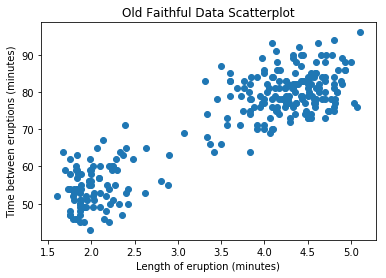

In [80]:
#https://www.springboard.com/blog/data-mining-python-tutorial/
pyplot.scatter(data.eruptions, data.waiting)
pyplot.title('Old Faithful Data Scatterplot')
pyplot.xlabel('Length of eruption (minutes)')
pyplot.ylabel('Time between eruptions (minutes)')

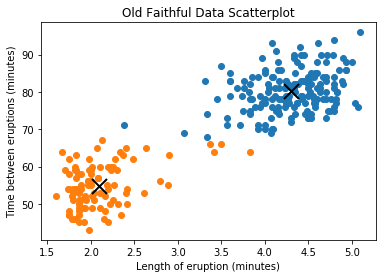

In [81]:
#http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html

for i in range(k):
    # select only data observations with cluster label == i
    ds = data.iloc[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds.iloc[:,0],ds.iloc[:,1],'o')    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
    pyplot.title('Old Faithful Data Scatterplot')
    pyplot.xlabel('Length of eruption (minutes)')
    pyplot.ylabel('Time between eruptions (minutes)')
pyplot.show()


In [138]:
#https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html